In [4]:
import mat
import pandas as pd
import numpy as np
import seaborn as sns
import ete3

The matreePy API is a wrapper on the Mutation_Annotated_Tree namespace and select matUtils functions, including the Tree and Node classes. 

In [5]:
%%time
#loading takes several seconds, like the command line.
t = mat.MATree("public-latest.all.masked.pb.gz")

CPU times: user 24 s, sys: 2.66 s, total: 26.6 s
Wall time: 18.6 s


In [3]:
t.get_parsimony_score()

3370883

As a comparison point for efficiency, let's use the popular python phylogenetics package ete3. ete3 only works with newick, not with mutation annotated trees directly.

In [6]:
nwk = t.get_newick_string()

In [11]:
%%time
etetree = ete3.Tree(nwk.decode("UTF-8"),1)

CPU times: user 1min 11s, sys: 3.62 s, total: 1min 14s
Wall time: 1min 16s


Ete3 takes six times longer to load *just* the newick tree sans mutations. The power of the MAT library is not to be underestimated!

The API can extract subtrees with requested attributes, much like matUtils extract, and save the results to a new protobuf file.

In [3]:
%%time
omicron = t.get_clade("BA.1")
print("Omicron Total Parsimony:",omicron.get_parsimony_score())
omicron.save_pb("omicron_only.pb")

Getting clade: BA.1
Successfully found 485436 samples.
Omicron Total Parsimony: 299269


Large sample input; building subtree by pruning all but 485436 samples.


The API can traverse the tree in breadth- or depth-first order and contains a python-readable MATNode class!

In [12]:
%%time
allnodes = t.depth_first_expansion()
len(allnodes)

CPU times: user 414 ms, sys: 660 ms, total: 1.07 s
Wall time: 1.34 s


4982004

In [14]:
%%time
#and how does this compare to ete3 traversal time?
for node in etetree.traverse('postorder'):
    pass

CPU times: user 3.11 s, sys: 648 ms, total: 3.76 s
Wall time: 5.01 s


We can see already that despite tracking mutations assigned to each node, our wrapper is ~5x faster than the equivalent functions in ete3. A great sign for usability!

In [8]:
help(allnodes[250])

Help on MATNode object:

class MATNode(builtins.object)
 |  A wrapper around the MAT node class. Has an identifier, mutations, parent, and child attributes.
 |  
 |  Methods defined here:
 |  
 |  __reduce__ = __reduce_cython__(...)
 |  
 |  __setstate__ = __setstate_cython__(...)
 |  
 |  get_annotations(...)
 |  
 |  get_children(...)
 |  
 |  get_id(...)
 |  
 |  get_mutations(...)
 |  
 |  get_parent(...)
 |  
 |  is_leaf(...)
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __pyx_vtable__ = <capsule object NULL>



The node class contains getter methods for each of the original C++ node class attributes, allowing for python-levle parsing and selection of nodes from a set of MATNode objects.

In [15]:
leaves = [n for n in allnodes if n.is_leaf()]
len(leaves)

4123823

Finally, the API can also support cython-only functions for particular analytical applications. Here is one example- a function which counts individual mutation types across all nodes and loads them into a Python dictionary!

CPU times: user 1.31 s, sys: 705 ms, total: 2.01 s
Wall time: 2.18 s


/Users/jmcbr/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

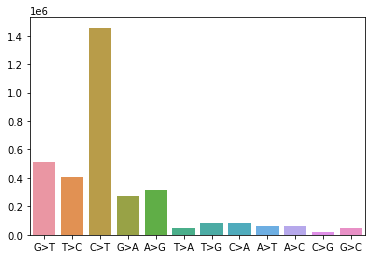

In [16]:
%%time
mcount = t.count_mutations()
sns.barplot(list(mcount.keys()),list(mcount.values()))

Altogether, this wrapper exposes basic and extremely useful functions of the excellent Mutation_Annotated_Tree library and matUtils to Python to allow for efficient and informed analysis.

If you've ever found yourself trying to run an analysis on a MAT pb and been frustrated by the linear nature of the command line tools and the constant need to parse different text files, this wrapper could help you!

I'm seeking feedback on any and all aspects of the wrapper and am collecting it in a google doc [here](https://docs.google.com/document/d/1UR82v2xJixnEIEHRh7jZawClOqmsufrPWELygq8lb_Y/edit?usp=sharing). Try it out!